In [62]:
import numpy as np, pandas as pd
import os,glob, re

dfs = {re.search('/([^/\.]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob(os.getcwd()+'/Raw/*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['air_reserve', 'air_store_info', 'air_visit_data', 'date_info', 'hpg_reserve', 'hpg_store_info', 'sample_submission', 'store_id_relation']
local variables with the same names are created.


In [63]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [64]:
air_visit_data['date_str'] = air_visit_data['visit_date']
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
air_visit_filtered_2016 = air_visit_data[air_visit_data['visit_date'] < pd.to_datetime('2016-05-31')]

In [65]:
air_visit_filtered_2016.head()

,air_store_id,visit_date,visitors,date_str
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18


In [66]:
req_stores = sample_submission.id.str[:20].unique()
dat_2016 = pd.DataFrame(req_stores,columns=['air_store_id']).merge(air_visit_filtered_2016,how = 'inner',on = 'air_store_id')

In [67]:
dat_2016.shape

(38824, 4)

In [68]:
dat_2016.head()

,air_store_id,visit_date,visitors,date_str
0,air_0241aa3964b7f861,2016-01-03,10,2016-01-03
1,air_0241aa3964b7f861,2016-01-04,9,2016-01-04
2,air_0241aa3964b7f861,2016-01-05,17,2016-01-05
3,air_0241aa3964b7f861,2016-01-06,10,2016-01-06
4,air_0241aa3964b7f861,2016-01-08,5,2016-01-08


In [69]:
dat_2016['air_store_id'].nunique()

313

In [70]:
air_visit_filtered_2017 = air_visit_data[air_visit_data['visit_date'] > pd.to_datetime('2016-12-31')]
dat_2017 = pd.DataFrame(dat_2016['air_store_id'].unique(),columns=['air_store_id']).merge(air_visit_filtered_2017,how = 'inner',on = 'air_store_id')

In [71]:
dat_2017.shape

(29422, 4)

In [72]:
dat_2017.head()

,air_store_id,visit_date,visitors,date_str
0,air_0241aa3964b7f861,2017-01-04,22,2017-01-04
1,air_0241aa3964b7f861,2017-01-05,6,2017-01-05
2,air_0241aa3964b7f861,2017-01-06,3,2017-01-06
3,air_0241aa3964b7f861,2017-01-07,9,2017-01-07
4,air_0241aa3964b7f861,2017-01-08,7,2017-01-08


In [73]:
dat_2017['air_store_id'].nunique()

313

In [74]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [75]:
dat_2016['dow'] = dat_2016.visit_date.dt.dayofweek
dat_2016['woy'] = dat_2016.visit_date.dt.weekofyear
dat_2016 = dat_2016.merge(date_info,how = 'left',left_on = 'date_str',right_on= 'calendar_date')
dat_2016.drop(['date_str','calendar_date','day_of_week'],axis = 1,inplace = True)
dat_2016.head()

,air_store_id,visit_date,visitors,dow,woy,holiday_flg
0,air_0241aa3964b7f861,2016-01-03,10,6,53,1
1,air_0241aa3964b7f861,2016-01-04,9,0,1,0
2,air_0241aa3964b7f861,2016-01-05,17,1,1,0
3,air_0241aa3964b7f861,2016-01-06,10,2,1,0
4,air_0241aa3964b7f861,2016-01-08,5,4,1,0


In [76]:
dat_2017['dow'] = dat_2017.visit_date.dt.dayofweek
dat_2017['woy'] = dat_2017.visit_date.dt.weekofyear
dat_2017 = dat_2017.merge(date_info,how = 'left',left_on = 'date_str',right_on= 'calendar_date')
dat_2017.drop(['date_str','calendar_date','day_of_week'],axis = 1,inplace = True)
dat_2017.head()

,air_store_id,visit_date,visitors,dow,woy,holiday_flg
0,air_0241aa3964b7f861,2017-01-04,22,2,1,0
1,air_0241aa3964b7f861,2017-01-05,6,3,1,0
2,air_0241aa3964b7f861,2017-01-06,3,4,1,0
3,air_0241aa3964b7f861,2017-01-07,9,5,1,0
4,air_0241aa3964b7f861,2017-01-08,7,6,1,0


In [77]:
import seaborn as sns
%matplotlib inline

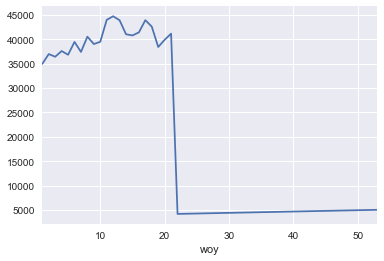

In [78]:
dat_2016.groupby(['woy'])['visitors'].sum().plot()

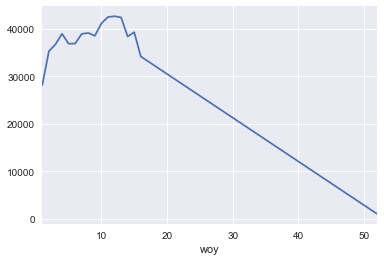

In [79]:
dat_2017.groupby(['woy'])['visitors'].sum().plot()

In [80]:
dat_2016['visitors16'] = dat_2016['visitors']
dat_2017['visitors17'] = dat_2017['visitors']

simple_dat16 = dat_2016.drop(['visitors','visit_date'],axis=1)
simple_dat17 = dat_2017.drop(['visitors','visit_date'],axis=1)

In [81]:
merged = simple_dat17.merge(simple_dat16,how = 'outer',on = ['air_store_id','dow','woy'])

In [108]:
merged[(merged['holiday_flg_y'] ==0) & (merged['air_store_id'] =='air_082908692355165e')]

,air_store_id,dow,woy,holiday_flg_x,visitors17,holiday_flg_y,visitors16,ratio
853,air_082908692355165e,2,1,0.0,45.0,0.0,49.0,0.918367
854,air_082908692355165e,3,1,0.0,45.0,0.0,41.0,1.097561
855,air_082908692355165e,4,1,0.0,65.0,0.0,68.0,0.955882
856,air_082908692355165e,5,1,0.0,21.0,0.0,13.0,1.615385
857,air_082908692355165e,6,1,0.0,14.0,0.0,4.0,3.500000
859,air_082908692355165e,1,2,0.0,71.0,0.0,52.0,1.365385
860,air_082908692355165e,2,2,0.0,48.0,0.0,66.0,0.727273
861,air_082908692355165e,3,2,0.0,57.0,0.0,30.0,1.900000
862,air_082908692355165e,4,2,0.0,16.0,0.0,52.0,0.307692
863,air_082908692355165e,5,2,0.0,70.0,0.0,42.0,1.666667


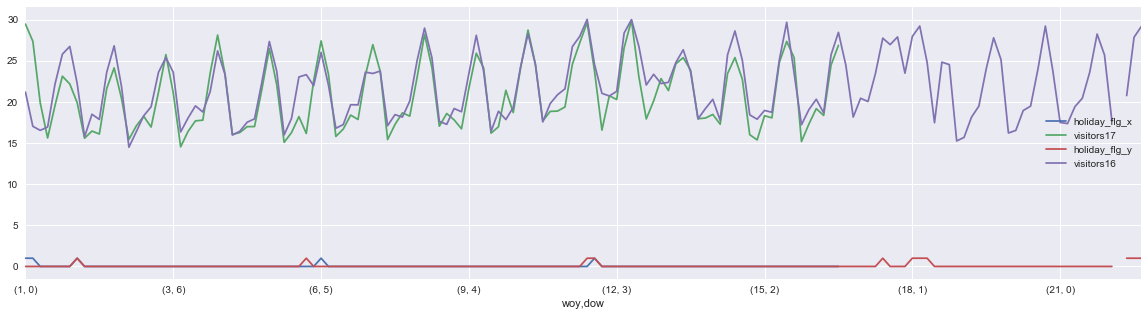

In [83]:
merged.groupby(['woy','dow']).mean().plot(figsize = (20,5))

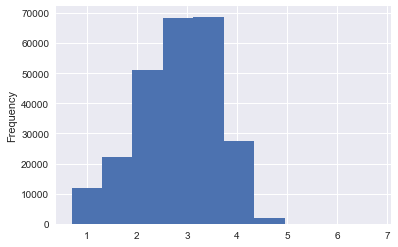

In [102]:
pd.np.log1p(air_visit_data['visitors']).plot.hist()

In [95]:
merged[merged['visitors16'] == merged['visitors16'].max()]

,air_store_id,dow,woy,holiday_flg_x,visitors17,holiday_flg_y,visitors16,ratio
7330,air_43d577e0c9460e64,6,3,0.0,40.0,0.0,514.0,0.077821


In [85]:
merged['ratio'] = merged.visitors17/merged.visitors16
merged.describe()

,dow,woy,holiday_flg_x,visitors17,holiday_flg_y,visitors16,ratio
count,41775.000000,41775.000000,29422.000000,29422.000000,38824.000000,38824.000000,26471.000000
mean,2.999641,11.175224,0.031371,20.789715,0.053575,21.894215,1.353464
std,1.947158,6.783243,0.174321,16.750055,0.225180,17.156807,2.060346
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.005952
25%,1.000000,6.000000,0.000000,9.000000,0.000000,10.000000,0.586207
50%,3.000000,11.000000,0.000000,17.000000,0.000000,18.000000,0.945455
75%,5.000000,16.000000,0.000000,29.000000,0.000000,30.000000,1.444444
max,6.000000,53.000000,1.000000,877.000000,1.000000,514.000000,51.000000


In [ ]:
merged[merged['air_store_id'] == 'air_fe58c074ec1445ea']

In [ ]:
merged[(merged['air_store_id'] == 'air_fe58c074ec1445ea') & (merged['dow'] == 3)]

In [ ]:
ratioed = pd.DataFrame(merged.groupby(['air_store_id','dow'])['ratio'].median()).reset_index()
ratioed.describe()
#.plot()

In [ ]:
# for n,i in enumerate(merged['air_store_id'].unique()):
#     g = merged[merged['air_store_id'] == i].groupby(['woy','dow']).mean().plot(figsize = (20,5),title = i)
#     if n == 25:
#         break

In [ ]:
sample_submission['air_store_id'] = sample_submission.id.str[:20]
sample_submission['date'] = sample_submission.id.str[21:]
sample_submission['dow'] = pd.to_datetime(sample_submission['date']).dt.dayofweek
sample_submission['woy'] = pd.to_datetime(sample_submission['date']).dt.weekofyear
sample_submission.drop('visitors',axis=1,inplace = True)
sample_submission.tail()

In [ ]:
finalized = sample_submission.merge(merged.drop(['visitors17','ratio'],axis = 1),
                                    how = 'left',on = ['air_store_id','dow','woy'])

finalized.dropna(inplace = True)
finalized.head()

In [ ]:
finalized = finalized.merge(ratioed,how = 'left', on = ['air_store_id','dow'])
finalized.head()

In [ ]:
finalized['visitors'] = finalized['ratio'] * finalized['visitors16']
finalized.head()

In [ ]:
final_finalized = finalized[['id','visitors']]
final_finalized.head()

JOIN with earlier submission

In [ ]:
sub2 = pd.read_csv('sample_submission4.csv')
sub2.head()

In [ ]:
sub5 = sub2.merge(final_finalized,how = 'left', on = ['id'])
sub5['visitors'] = sub5['visitors_x']
sub5.head()
sub5.loc[pd.notnull(sub5['visitors_y']),'visitors'] = (sub5['visitors_x'] + sub5['visitors_y'])/ 2

In [ ]:
sub5.head()

In [ ]:
sub5[sub5.visitors_x != sub5.visitors]

In [ ]:
submit5 = sub5[['id','visitors']]

In [ ]:
submit5.tail()

In [ ]:
submit5.to_csv('sample_submission7.csv', float_format='%.4f', index=None)

In [ ]:
finalized[finalized['air_store_id'] == 'air_fe22ef5a9cbef123']

In [ ]:
#